In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\doshi\Downloads\news.csv")
df.head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [2]:
df.shape

(6335, 4)

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df.head(2)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [8]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


# EDA

In [9]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

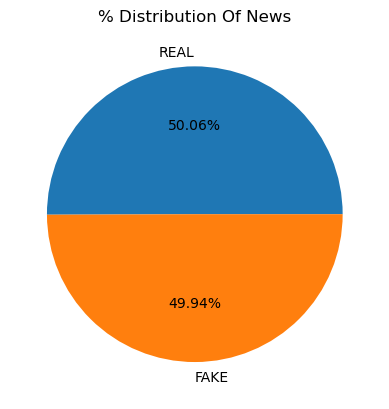

In [11]:
plt.pie(x=df["label"].value_counts().values,labels=df["label"].value_counts().index,autopct="%0.2F%%")
plt.title("% Distribution Of News")
plt.show()

In [12]:
df.head(5)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
import regex as re
def filter_text(text):
    text=text.strip()  # removing white space
    text=text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # removing special character
    return(text)
df["clean_text"]=df["text"].apply(filter_text)

In [14]:
df["clean_text"]

0       daniel greenfield a shillman journalism fellow...
1       google pinterest digg linkedin reddit stumbleu...
2       us secretary of state john f kerry said monday...
3        kaydee king kaydeeking november 9 2016 the le...
4       its primary day in new york and frontrunners h...
                              ...                        
6330    the state department told the republican natio...
6331    the p in pbs should stand for plutocratic or p...
6332    antitrump protesters are tools of the oligarch...
6333    addis ababa ethiopia president obama convened ...
6334    jeb bush is suddenly attacking trump heres why...
Name: clean_text, Length: 6335, dtype: object

In [15]:
df["label"].replace(["FAKE","REAL"],[0,1],inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
inp=df["clean_text"]
out=df["label"]
x_train,x_test,y_train,y_test=train_test_split(inp,out,test_size=0.20,random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
cv=CountVectorizer(binary=True,max_features=1000)
x_train_binary=cv.fit_transform(x_train)
x_test_binary=cv.transform(x_test)
binary_df=pd.DataFrame(x_train_binary.toarray(),columns=cv.get_feature_names_out())
binary_df.head(10)

,10,100,11,12,15,20,2008,2011,2012,2013,...,wrote,year,years,yes,yet,york,you,young,your,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
6,1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)
x_train_count=cv.fit_transform(x_train)
x_test_count=cv.transform(x_test)
count_df=pd.DataFrame(x_train_count.toarray(),columns=cv.get_feature_names_out())
count_df

,10,2012,2016,able,about,according,across,act,action,actually,...,working,world,would,wrote,year,years,yet,york,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,4,1
3,0,0,1,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,2
4,0,0,2,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0,0,0,1,12,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3,1
5064,0,0,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,4,1
5065,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
5066,0,0,0,1,1,0,0,0,0,1,...,2,0,4,0,0,0,0,1,0,0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=10000)
x_train_tfid=tf.fit_transform(x_train)
x_test_tfid=tf.transform(x_test)
tfidf_df=pd.DataFrame(x_train_tfid.toarray(),columns=tf.get_feature_names_out())
tfidf_df

,01,10,100,1000,10000,100000,101,10th,10year,11,...,zervos,zika,zionism,zionist,zionists,zone,zones,zuckerberg,zulu,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler(with_mean=False)
x_train_scaled=ss.fit_transform(x_train_tfid)
x_test_scaled=ss.transform(x_test_tfid)

---Logistic Regression----

Training Accuracy :  100.0
Testing Accuracy :  92.18626677190213
Accuracy Score :  92.18626677190213
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       628
           1       0.92      0.93      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



------Confusion Matrix Of Logistic Regression-----


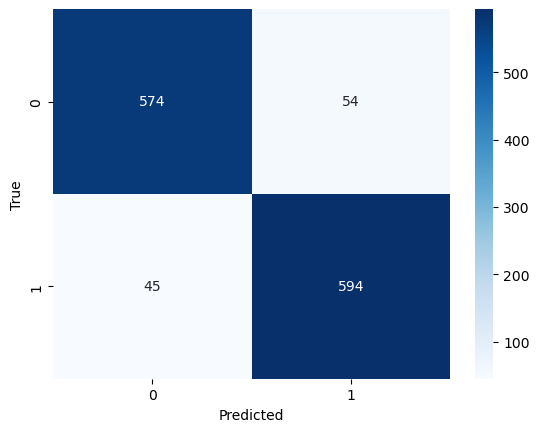

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
print("---Logistic Regression----\n")
print("Training Accuracy : ",lr.score(x_train_scaled,y_train)*100)
print("Testing Accuracy : ",lr.score(x_test_scaled,y_test)*100)
print("Accuracy Score : ",accuracy_score(y_test,lr.predict(x_test_scaled))*100)
print(classification_report(y_test,lr.predict(x_test_scaled)))
print("\n")
print("------Confusion Matrix Of Logistic Regression-----")
cm=confusion_matrix(y_test,lr.predict(x_test_scaled))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
output_df=pd.DataFrame({"Original Output":y_test,"Predicted Output":lr.predict(x_test_scaled)})
output_df

,Original Output,Predicted Output
1357,0,0
2080,0,0
2718,0,0
812,0,0
4886,0,0
...,...,...
1512,0,0
57,1,1
6092,1,1
3403,1,0


---Decision Tree Regression----

Training Accuracy :  77.95974743488556
Testing Accuracy :  76.55880031570639
Accuracy Score :  76.55880031570639
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       628
           1       0.78      0.75      0.76       639

    accuracy                           0.77      1267
   macro avg       0.77      0.77      0.77      1267
weighted avg       0.77      0.77      0.77      1267



------Confusion Matrix Of Decision Tree Classifier-----


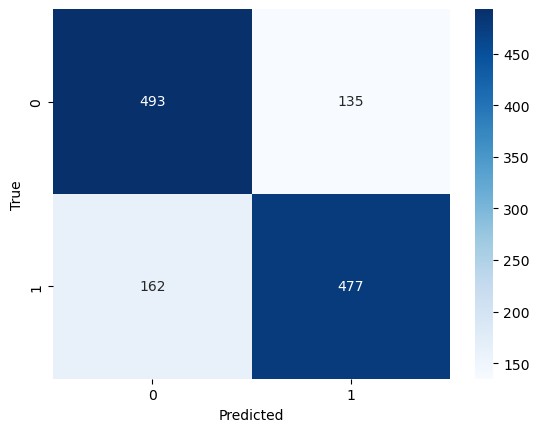

In [23]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="log_loss",splitter="best",max_depth=4)
dc.fit(x_train_scaled,y_train)
print("---Decision Tree Regression----\n")
print("Training Accuracy : ",dc.score(x_train_scaled,y_train)*100)
print("Testing Accuracy : ",dc.score(x_test_scaled,y_test)*100)
print("Accuracy Score : ",accuracy_score(y_test,dc.predict(x_test_scaled))*100)
print(classification_report(y_test,dc.predict(x_test_scaled)))
print("\n")
print("------Confusion Matrix Of Decision Tree Classifier-----")
cm=confusion_matrix(y_test,dc.predict(x_test_scaled))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xl()abel("Predicted")
plt.ylabel("True")
plt.show()

---Random Forest Classifier----

Training Accuracy :  76.99289660615626
Testing Accuracy :  75.5327545382794
Accuracy Score :  75.5327545382794
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       628
           1       0.80      0.69      0.74       639

    accuracy                           0.76      1267
   macro avg       0.76      0.76      0.75      1267
weighted avg       0.76      0.76      0.75      1267



------Confusion Matrix Of Random Forest Classifier-----


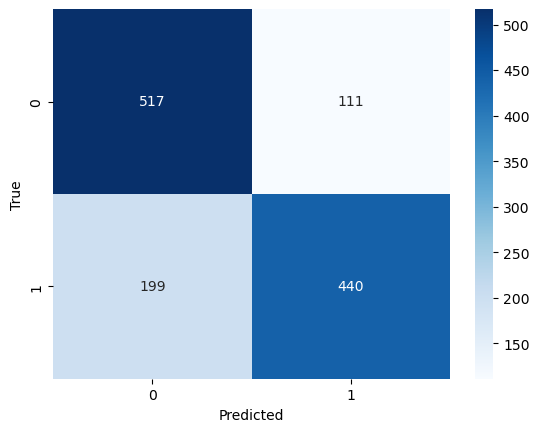

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=80,criterion="gini",max_depth=1)
rfc.fit(x_train_scaled,y_train)
print("---Random Forest Classifier----\n")
print("Training Accuracy : ",rfc.score(x_train_scaled,y_train)*100)
print("Testing Accuracy : ",rfc.score(x_test_scaled,y_test)*100)
print("Accuracy Score : ",accuracy_score(y_test,rfc.predict(x_test_scaled))*100)
print(classification_report(y_test,rfc.predict(x_test_scaled)))
print("\n")
print("------Confusion Matrix Of Random Forest Classifier-----")
cm=confusion_matrix(y_test,rfc.predict(x_test_scaled))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()